In [2]:
from fastai.vision import *

In [1]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [7]:
folder = 'black'
file = 'urls_black.txt'

In [10]:
folder = 'teddy'
file = 'urls_teddy.txt'

In [11]:
## 위에 3개의 folder,file지정후 이 셀을 실행하지 않으면 이미지가 다른곳에 저장됩니다.
path = Path('/home/ubuntu/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
path.ls()

[PosixPath('/home/ubuntu/data/bears/urls_teddy.txt'),
 PosixPath('/home/ubuntu/data/bears/urls_grizzly.txt'),
 PosixPath('/home/ubuntu/data/bears/urls_black.txt'),
 PosixPath('/home/ubuntu/data/bears/.ipynb_checkpoints'),
 PosixPath('/home/ubuntu/data/bears/grizzly')]

In [12]:
download_images(path/file, dest, max_pics = 350)

In [14]:
classes = ['teddy', 'grizzly', 'black']

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2, 
                                 ds_tfms = get_transforms(),
                                 size=224,
                                 num_workers=4).normalize(imagenet_stats)

In [18]:
print(data)

ImageDataBunch;

Train: LabelList (753 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /home/ubuntu/data/bears;

Valid: LabelList (188 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddy,teddy,teddy,teddy,black
Path: /home/ubuntu/data/bears;

Test: None


In [19]:
data.classes

['black', 'grizzly', 'teddy']

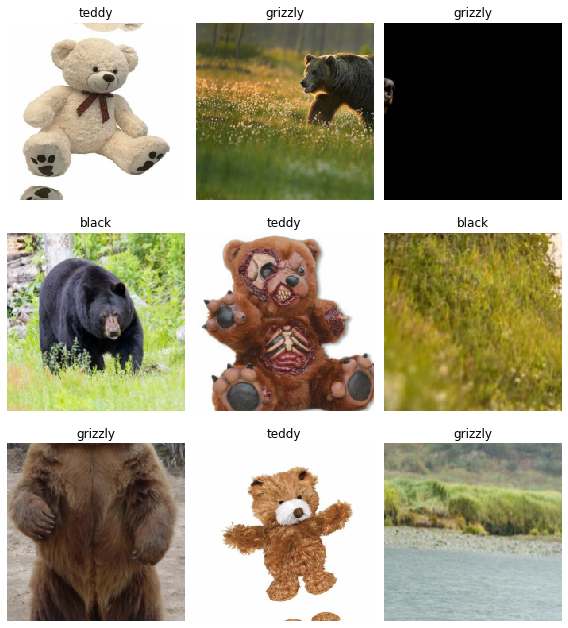

In [20]:
data.show_batch(rows=3, figsize=(8,9))

In [21]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

/home/ubuntu/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.859591,0.172156,0.058511,00:11
1,0.483220,0.189650,0.063830,00:08
2,0.325123,0.168636,0.058511,00:08
3,0.248946,0.163209,0.063830,00:08


In [23]:
learn.save('stage-1')

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


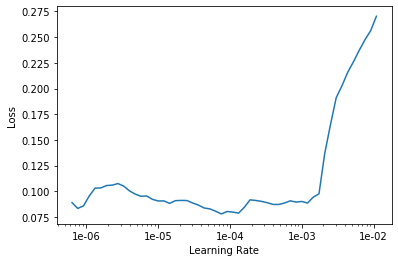

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.099549,0.212329,0.063830,00:10
1,0.076380,0.204539,0.063830,00:10


In [28]:
learn.save('stage-2')

In [29]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (753 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /home/ubuntu/data/bears;

Valid: LabelList (188 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddy,teddy,teddy,teddy,black
Path: /home/ubuntu/data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

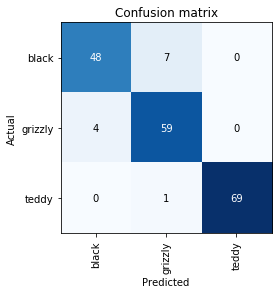

In [31]:
interp.plot_confusion_matrix()

In [36]:
interp.most_confused(min_val=0)

[('black', 'grizzly', 7),
 ('grizzly', 'black', 4),
 ('teddy', 'grizzly', 1),
 ('black', 'black', 0),
 ('black', 'teddy', 0),
 ('grizzly', 'grizzly', 0),
 ('grizzly', 'teddy', 0),
 ('teddy', 'black', 0),
 ('teddy', 'teddy', 0)]

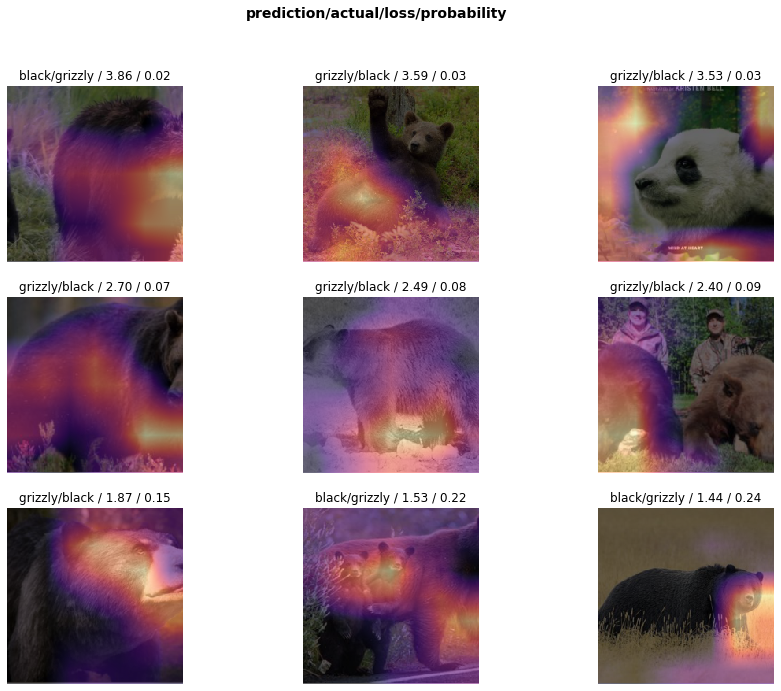

In [33]:
interp.plot_top_losses(9, figsize=(15,11))